# Interpolación: Diferencias divididas hacia adelante y hacia atrás 

**Objetivo general** 
- Entender e implementar el método de diferencias divididas hacia adelante y hacia atrás.
- Entender la notación de Aikten para el cálculo de las diferencias divididas.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

# Diferencias divididas hacia adelante

Recordemos cómo es el polinomio de Newton utilizando diferencias divididas,


$$ P_{n}\left(x \right) = f[x_{0}] + f[x_{0},x_{1}](x-x_{0}) + f[x_{0},x_{1},x_{2}](x-x_{0})(x-x_{1}) + \dots + f[x_{0},x_{1},\cdots,x_{n}](x-x_{0})(x-x_{1})\cdots (x-x_{n}) $$

Ahora, si los valores de $x$ de los puntos que tenemos están igualmente espaciados, es decir, entre todos existe la misma difrencia.

Ejemplo de conjuntos de valores de $x$ que cumplen con esto son,

1. $x=[0,1,2,3,4,5]$ cada valor está a una unidad del otro
2. $x=[-0.5,0,0.5,0.1,1.5]$ hay una diferencia cosntance de 0.5 entre todos
3. $x=[4,8,12,16]$ cada uno está a cuatro unidades del otro.

Entonces los multiplicandos $(x-x_{i})$ pueden expresarse como $[x-(x_{0}-i)h]$ donde $h$ es la diferencia constante entre dos puntos e $i=0,1,\dots,n-1$.

Cambiando la notación $s=x-x_{0}$, entonces $(x-x_{i})=(s-i)h$

Por lo tanto,

$$ P_{n}\left(x \right) = f[x_{0}] + f[x_{0},x_{1}]sh + f[x_{0},x_{1},x_{2}]s(s-1)h^{2} + \dots + f[x_{0},x_{1},\dots,x_{n}]s(s-1)\cdots (s-n+1)h^{n} $$

Ahora, utilizando notacion de coeficiente binomial,

$$\binom{s}{k}=\frac{s(s-1)\cdots(s-k+1)}{k!}$$

$$ P_{n}\left(x \right) = f[x_{0}] + \sum_{k=1}^{n} f[x_{0},x_{1},\dots,x_{k}]s(s-1)\cdots (s-k+1)h^{k} $$
$$ P_{n}\left(x \right) = f[x_{0}] + \sum_{k=1}^{n} f[x_{0},x_{1},\dots,x_{k}]\binom{s}{k}k!h^{k} $$

También nos hace falta considerar un detalle.

Y es que las diferencias divididas pueden calcularse ligeramente diferente. 

De $f[x_{0}]$,  $f[x_{1}]$, $f[x_{2}]$, hasta $f[x_{n}]$ no nos preocupamos pues son solo los correspondientes valores $y_{i}$ de los puntos que ya tenemos, pero por ejemplo,


$$f[x_{0},x_{1}] = \frac{f(x_{1})-f(x_{0})}{x_{1}-x_{0}}$$

Como ya habíamos mencionado, $h$ es el valor de la diferencia entre los valores $x$ de dos puntos consecutivos, por simplicidad tomaremos $h=x_{1}-x_{0}$. Pero recordando que los valores $x$ estan igualmente espaciados, $x_{i}-x_{j}$ sigue siendo $h$ para cualquier $i>j$ con $i={1,2,\dots,n}$ y $j={0,1,\dots,n-1}$.

Así, 
$$f[x_{0},x_{1}] = \frac{f(x_{1})-f(x_{0})}{h}$$.


## Notación de Aikten

Además, se puede utilizar la notación $\Delta^{2}$ de Aikten (véase Analisis Númerico, Richard Burden, décima edición, p.64), donde $\Delta f(x_{0}) = f(x_{1}) - f(x_{0})$ y $\Delta^{k} = \Delta(\Delta^{k-1})$ se define de manera recursiva, por ejemplo,

$\Delta^{2} = \Delta(\Delta f(x_{0})) = \Delta(f(x_{1}) - f(x_{0}))=\Delta f(x_{1})-\Delta f(x_{0}) = f(x_{2}) - f(x_{1}) - \left(f(x_{1}) - f(x_{0})\right)$

## Ejercicio 1

Calcula, usando la notación de Akiten y el término $h$, la segunda diferencia dividida $f[x_{0},x_{1},x_{2}]$. Recomendación: primero escribe la diferencia dividida en términos de $f[x_{0},x_{1}]$ y de $f[x_{1},x_{2}]$

**Solución**


$$=\frac{\frac{f(x_{2}-f(x_{1})}{x_{2}-x_{1}}-\frac{f(x_{1}-f(x_{0})}{x_{1}-x_{0}}}{x_{2}-x_{0}} = \frac{\frac{\Delta f(x_{1})}{h} - \frac{\Delta f(x_{0})}{h}}{2h} = \frac{\frac{1}{h}\Delta \left( f(x_{1})-f(x_{0}) \right)}{2h} = \frac{\Delta \left( f(x_{1})-f(x_{0}) \right)}{2h^{2}} = \frac{\Delta^{2} f(x_{0})} {2h^{2}}$$

## Ejercicio 2

Nuevamente, usando la notación de Akiten y el término $h$, calcula la tercera diferencia dividida $f[x_{0},x_{1},x_{2},x_{3}]$. Recomendación: utiliza la diferencia dividida calculada anteriormente

**Solución**

$$\frac{\Delta^{3}f(x_{0})}{3! h^{3}}$$

Así, 

$$f[x_{0},x_{1},\dots,x_{k}] = \frac{1}{k!h^{k}}\Delta^{k}f(x_{0}) $$

Por lo tanto, la expresión que teníamos $ P_{n}\left(x \right) = f[x_{0}] + \sum_{k=1}^{n} f[x_{0},x_{1},\dots,x_{k}]\binom{s}{k}k!h^{k} $, la podemos reescribir como,


$$P_{n}\left(x \right) = f[x_{0}] + \sum_{k=1}^{n}\Delta^{k}f(x_{0}) \binom{s}{k} $$

Nuestro codigo será muy parecido al anterior pero definiremos nuevas funciones

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

La función `factorial()` la definimos como sigue:

In [2]:
def factorial(n):
    """
    funcion factorial
    
    Recodermos que la función facotrial se calcula como n*n(n-1)*...*1
    
    Input
    n: el número del que queremos conocer su facotrial. Debe ser mayor o igual que cero
    
    
    Output:
    
    j: el factorial del número.
    
    """
    j=1
    for i in range(2,n+1):
        j = j*i
    return j

Luego, definimos una función para calcular un coeficiente binomial,

In [3]:
def coefBinom(s,k):
    """
    El coeficiente binomial calcula el número toal de formas de escoger k elementos no ordendos de n elementos. 
    Además el coeficiente (n,k) es el coeficiente que acompaña al término x^k del binomio (1+x)^k 
    
    Input:
    s: el número total de elementos
    k: los k elementos sin ordenar que queremos obtener
    
    Output:
    result: el resultado del coeficiente binomial
    """
    numerador = factorial(s)
    denominador = factorial(k)*factorial(s-k)
    result = numerador/denominador
    return int(result)
    

In [4]:
coefBinom(7,2)*factorial(2)

42

Para el caso del código de diferencias divididas hacemos un pequeño cambio. Ya sabemos que $f[x_{0,x_{1},\dots,x_{k}}] = \frac{1}{k!h^{k}}\Delta^{k}f(x_{0}) $.

$\Delta^{k}f(x_{0})$, que solo son diferencias de valores $f(x_{i})$, ya se está obteniendo con la parte de 
`(coef[i+1][j-1] - coef[i][j-1])`. Y como en el código, las diferencias divididas las calculamos a partir de anteriores, no necesitamos calcular desde cero cada $\Delta^{k} f(x_{0})$. 

En el denominador ahora podemos usar `h` en vez de `(x[i+j]-x[i])` porque la diferencia es constante. Y nuevamente, dado que calculamos las diferencias divididas a partir de anteriores, no necesitamos elevar $h$ a la $k$. El resultado de términos anteriores ya incluye la división entre $h$, por lo que se irán acumulando las divisiones entre $h$ y por lo tanto no necesitamos calcular $h^{k}$ en cada diferencia dividida.

Finalmente, agregamos `factorial(j)` en el denominador para calcular $\frac{1}{k!}$

In [5]:
def diferencias_divididas(x,y):
    """
    diferencias_divididas recibe como entrada los valores x y los valores y de los puntos que tenemos y  
    calcula los coeficientes del polinomio de interpolación o lo mismo, las diferencias divididas de igual manera
    que como rellenamos la tabla y devuelve la tabla con los valores
    
    Input: 
    x: el arreglo de los valores x de los puntos que conocemos
    y: el arreglo de los valores y de los puntos que conocemos
    
    Output:
    coef: matriz o tabla de las diferencias divididas
    
    """
    h = int(np.abs(x[1]-x[0])) #usamos el valor abosluto para el caso de que el valor 1 o 2 de los valores x que tenemos sean negativos
    n = len(y)
    
    # crea una matriz de ceros de n filas por n columnas con n igual a el número de elementos de valores de y

    coef = np.zeros([n,n])
    
    # rellena la primera columna de la matriz de coeficientes con los datos y
    coef[:,0] = y
    
    # para el indice de la columna de 1 hasta el n-esimo punto
    for j in range(1,n):
        # para el indice de la fila desde el n-esimo punto menos el valor de la columna
        for i in range(n-j):
            # el valor de la matriz en la fila i y en la columna j es el valor ...
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(j*h)
    
    return coef

In [6]:
x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 8, 27])

tabla_de_diferencias  = diferencias_divididas(x, y)

print(tabla_de_diferencias)

[[ 0.  1.  3.  1.]
 [ 1.  7.  6.  0.]
 [ 8. 19.  0.  0.]
 [27.  0.  0.  0.]]


Finalmente, los términos que acompañan a las diferencias divididas son el coeficiente binomial, el factorial de $k$ y $h^{k}$, por ello cambiamos la función multiplicandos.

In [7]:
def multiplicandos(i, value, x):
    """
    Calcula (s,k)*k!*h^{k}
    
    Input:
    i: i es el valor de k. Como k va 1 hasta el número de puntos que tenemos lo representamos con i y 
    es un valor cambiante en la funcion de polinomiodeNewton de mas adelante.
    value: el valor al que queremos interpolar.
    x: el arreglo o lista de valores x de nuestros puntos
    
    Output: 
    
    multplicando: (s,k)*k!*h^{k}
    
    """
    h = int(np.abs(np.abs(x[1]))-np.abs(x[0]))
    s = int((value-x[0])/h)
    multiplicando = 1;
    for k in range(1,i+1):
        multiplicando = coefBinom(s,k) * factorial(k) *(h**(k)) 
    return multiplicando;

Al final, juntamos las diferencias divididas y los multiplicnados que las acompañan. Por lo que, de manera similar a la función del polinomio de interpolación de Newton, creamos una funcion llamada `diferencias_hacia_adelanteNewton()`.

In [8]:
def diferencias_hacia_adelanteNewton(value, x, tabla, n):
 
    sum = tabla[0][0]
    h = int(np.abs(np.abs(x[1]))-np.abs(x[0]))

    for i in range(1, n):
        sum = sum + (multiplicandos(i, value, x) * tabla[0][i]);     
    return sum;

In [9]:
diferencias_hacia_adelanteNewton(4,x,tabla_de_diferencias,4)

64.0

[1.0, 1.0, 8.0, 27.0, 64.0]


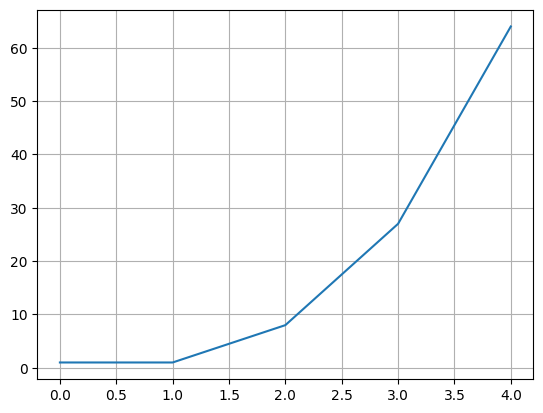

In [17]:
puntosx = [0,1,2,3,4]


fx = []
for i in puntosx:
    fx.append(diferencias_hacia_adelanteNewton(i,x,tabla_de_diferencias,4))
    
print(fx)
    
plt.plot(puntosx,fx)
plt.grid()
plt.show()

# Diferencias hacia atrás

Ahora, si empezamos por las diferencias divididas del final, tendríamos que 

$$P_{n}(x) = f[x_{n}]+f[x_{n},x_{n-1}](x-x_{n})+f[x_{n},x_{n-1},x_{n-2}](x-x_{n})(x-x_{n-1}) + \cdots + f[x_{n},\dots,x_{0}](x-x_{n})(x-x_{n-1})\cdots(x-x_{1})$$

Nuevamente, consideraremos que los valores $x$ de los puntos tienen el mismo espaciado.

Ahora $x=x_{n}+sh$ donde $h$ es la diferencia constante entre dos valores $x$ contiguos y $x=x_{i}+(s+n-i)h$.

Por lo tanto,

$$P_{n}(x) = f[x_{n}]+f[x_{n},x_{n-1}](sh)+f[x_{n},x_{n-1},x_{n-2}]s(s+1)h^{2} + \cdots + f[x_{n},\dots,x_{0}]s(s+1)(s+2)\cdots(s+n-1)h^{n}$$

Introducimos una nueva notación para expresar las diferencias divididas. En vez de $\Delta$ ahora usamos $\nabla$, donde $\nabla f(x_{n}) = f(x_{n})-f(x_{n-1})$ y $\nabla^{k} \left(f(x_{n}) \right) = \nabla \left(\nabla^{k-1} f(x_{n}) \right)$.

Así, cada $f[x_{n},x_{n-1},\dots,x_{n-k}] = \frac{1}{k!h^{k}}\nabla^{k}f(x_{n})$.

Finalmente, otra vez podemos reescibir los multiplicandos usando un coeficiente binomial.

$$\binom{-s}{k} = \frac{(-1)\cdots(-s)(-s-1)\cdots(-s-k+1)}{(k!)(-s-1)!}=\frac{(-1)(s)(-1)(s+1)\cdots(-1)(s+k-1)}{k!} = \frac{(-1)^{k}(s)(s+1)\cdots(s+k-1)}{k!}$$

Nota: cuando multipliquemos las diferencias divididas por los multiplicandos usando los coeficientes binomiales, multiplicaremos por $(-1)^{k}$ para quedarnos con una expresión positiva $(s)(s+1) \cdots (s+k-1)$, que nos interesa como equivalencia a $(x-x_{n})\cdots(x-x_{n-k-1})$ y no con la forma negativa $(-s)(-s-1)\cdots(-s-k+1)$ que nos ofrece el coeficiente binomial negativo.

Así, finalmente $P_{n}(x)$ es igual a 

$$P_{n}(x) = f[x_{n}]+f[x_{n},x_{n-1}](sh)+f[x_{n},x_{n-1},x_{n-2}]s(s+1)h^{2} + \cdots + f[x_{n},\dots,x_{0}]s(s+1)(s+2)\cdots(s+n-1)h^{n}$$

$$P_{n}(x) = f[x_{n}]+\sum_{k=1}^{n}f[x_{n},x_{n-1},\dots,x_{n-k}]\binom{-s}{k}(-1)^{k}k!h^{k}$$

Y por la expresion $\nabla$ de las diferencia divididas,

$$P_{n}(x) = f[x_{n}]+\sum_{k=1}^{n}\frac{1}{k!h^{k}}\nabla^{k}f(x_{n})\binom{-s}{k}(-1)^{k}k!h^{k}$$

$$P_{n}(x) = f[x_{n}]+\sum_{k=1}^{n}\nabla^{k}f(x_{n})(-1)^{k}\binom{-s}{k}$$

Para hacer lo anterior definimos una función para el coeficiente binomialnegativo (por cuestiones de practicidad no usamos los números negativos para posteriormente obtener números positivos multiplicando por $(-1)^{k}$, desde el principio obtenemos los términos positivos)

In [11]:
def coefbinomneg(s,k):
    """
    Calcula un coeficiente binomial negativo.
    
    Input
    s: el número total de elementos
    k: los k elementos sin ordenar que queremos obtener
    
    
    Output:
    result: el coeficiente binomial negativo (en forma postivia) de los parámetros 
    s y k
    
    """
    numerador = factorial(s+k-1)
    #print("numerador "  +str(numerador))
    denominador = factorial(k)*factorial(s-1)
    #print("denominador " + str(denominador))
    result = numerador/denominador
    return int(result)

In [12]:
def multiplicandoN(i,value,x):
    """
    Realiza el calculo de los multiplicandos de la
    interpolacion con diferencias hacia atrás, utilizando el coeficiente binomial negativo
    que nos ayuda a obtener (s)(s+1)...(s+k-1)/k!; el factorial de k para cancelarlo 
    con el de coeficiente binomial; y h^k donde h es la diferencia entre dos valores
    de x de dos puntos adyacentes.
    
    Input
    i: i es el valor de k. Como k va 1 hasta el número de puntos que tenemos lo representamos con i y 
    es un valor cambiante en la funcion de polinomiodeNewton de mas adelante.
    value: el valor al que queremos interpolar.
    x: el arreglo o lista de valores x de nuestros puntos
    """
    h = int(np.abs(np.abs(x[1]))-np.abs(x[0]))
    
    s = int((value-x[len(x)-1])/h)
    
    multiplicando= 1
    for k in range(1,i+1):
        multiplicando = coefbinomneg(s,k)*factorial(k)*(h**k)
    return multiplicando

In [13]:
def diferencias_hacia_atrasNewton(value, x, tabla, n):
    """
    Calcula el valor y que correspondería a cierto valor que 
    nos interesa saber utilizando diferencias divididas hacia atrás. 
    A diferencia de las diferencias divididas hacia adelante, en esta ocasión empezará
    por los últimos valores de las diferencias divididas hasta llegar a la n-ésima
    diferencia dividida que compartirá con las diferencias divididas hacia adelante.
    
    Input: 
    
    value: el valor que queremos interpolar
    x: el arreglo de valores de x de los puntos que conocemos
    tabla: la matriz o arreglo de las diferencias divididas 
    n: el número de puntos
    
    Output:
    sum: el valor y para el número que nos interesa.
    """ 
    sum = tabla[n-1][0]
    h = int(np.abs(np.abs(x[1]))-np.abs(x[0]))

    for i in range(1, n):
        sum = sum + (multiplicandoN(i, value, x) * tabla[n-1-i][i]);
    return sum;

In [14]:
diferencias_hacia_atrasNewton(6,x,tabla_de_diferencias,4)

216.0

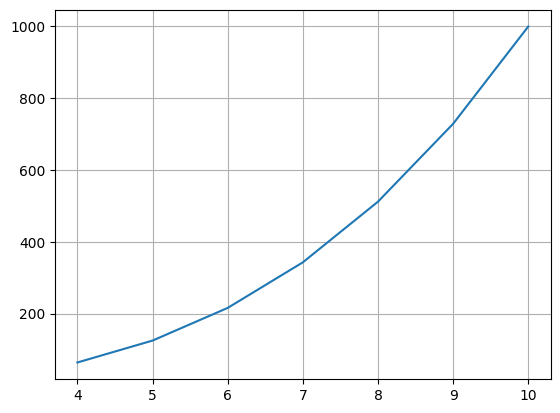

In [16]:
puntosx = [4,5,6,7,8,9,10]

fx = []
for i in puntosx:
    fx.append(diferencias_hacia_atrasNewton(i,x,tabla_de_diferencias,4))
    
plt.plot(puntosx,fx)
plt.grid()
plt.show()

## Ejercicio 3
Obten la tabla de diferencias divididas y grafica el resultado de interpolar los valores $[8,10,12,14]$ dado los puntos
$(0,2)$,$(2,13)$,$(4,69)$ y $(6,221)$ con el método de diferencias divididas hacia atrás.

In [18]:
a=np.array([0,2,4,6])
b=np.array([5,13,69,221])

tablasolucion = diferencias_divididas(a,b)
print(diferencias_divididas(a,b))

[[  5.   4.   6.   1.]
 [ 13.  28.  12.   0.]
 [ 69.  76.   0.   0.]
 [221.   0.   0.   0.]]


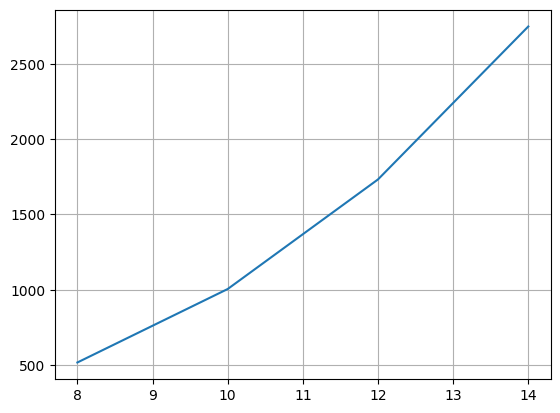

In [19]:
valoresx=[8,10,12,14]

fx= []
for i in valoresx:
    fx.append(diferencias_hacia_atrasNewton(i,a,tablasolucion,4))
    
plt.plot(valoresx,fx)
plt.grid()
plt.show()